Combined Two datasets


9899 images / 166 labels
https://universe.roboflow.com/dsstudy-h0rzy/food-ingredients-image-detection_team4


9819 images / 26 labels
https://universe.roboflow.com/data-orccx/food-ingredients-ftnpv



train pairs: 16884 /
test pairs: 1176 /
valid pairs: 1660 /
Total pairs: 19720

In [1]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 29944, done.
remote: Counting objects: 100% (553/553), done.
remote: Compressing objects: 100% (346/346), done.
remote: Total 29944 (delta 333), reused 371 (delta 207), pack-reused 29391
Receiving objects: 100% (29944/29944), 15.37 MiB | 12.89 MiB/s, done.
Resolving deltas: 100% (21543/21543), done.


In [2]:
%cd ./ultralytics

/content/ultralytics


In [3]:
!pip install -e .

Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-many

In [4]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.4 MB/s eta 0:00:00


In [5]:
from google.colab import drive
import os
import torch
import yaml
from IPython.display import Image, clear_output  # to display images

In [6]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.3.0+cu121 (NVIDIA L4)


In [21]:
data_dir = '/content/drive/MyDrive/DAB/Data_Food_Ingredients_0703'
data_yaml = '/content/drive/MyDrive/DAB/Data_Food_Ingredients_0703/data.yaml'

In [22]:
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

{'names': ['-',
  '10_pineapple',
  '10_tangerine',
  'Apple',
  'Bagel',
  'Banana',
  'Bitter melon',
  'Cucumber',
  'Garlic',
  'Green Chili',
  'Lady finger',
  'Mushroom',
  'Onion',
  'Orange',
  'Potato',
  'Sponge Gourd',
  'Tomato',
  'ampalaya',
  'apple',
  'asparagus',
  'avocado',
  'bacon',
  'banana',
  'beef',
  'bell pepper',
  'bell_pepper',
  'bento',
  'bitter gourd',
  'blueberries',
  'bok choy',
  'bottle',
  'bread',
  'broccoli',
  'butter',
  'cabbage',
  'can',
  'canned_tuna',
  'carrot',
  'cashew',
  'cauliflower',
  'cheese',
  'cherry',
  'chicken',
  'chicken breast',
  'chicken thigh',
  'chicken wing',
  'chicken_breast',
  'chilli',
  'chocolate',
  'corn',
  'crab',
  'cream-cheese',
  'cucumber',
  'dates',
  'egg',
  'egg_',
  'eggplant',
  'eggs',
  'fish',
  'fish_cake',
  'flour',
  'french_fries',
  'garlic',
  'ginger',
  'goat_cheese',
  'grapefruit',
  'grapes',
  'grated_cheese',
  'green chilli',
  'green-chillies',
  'green_beans',
  'g

In [23]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

In [25]:
model.train(data=data_yaml, epochs=3, imgsz=640, batch=32)

Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/DAB/Data_Food_Ingredients_0703/data.yaml, epochs=3, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

train: Scanning /content/drive/MyDrive/DAB/Data_Food_Ingredients_0703/train/labels... 8400 images, 0 backgrounds, 0 corrupt:  50%|████▉     | 8400/16884 [25:51<26:07,  5.41it/s]


KeyboardInterrupt: 

In [ ]:
# 연습용 checkpoint_dir 생성
checkpoint_dir = '/content/drive/MyDrive/DAB/checkpoints/practice'
os.makedirs(checkpoint_dir, exist_ok=True)

# Checkpoinnt 생성
# 마지막 epoch에서의 weight-checkpoint와 최선의 epoch에서의 weight-checkpoint 생성
import shutil
best_model_path = '/content/ultralytics/runs/detect/train5/weights/best.pt'
last_model_path = '/content/ultralytics/runs/detect/train5/weights/last.pt'

drive_best_model_path = '/content/drive/MyDrive/DAB/checkpoints/0703/best.pt'
drive_last_model_path = '/content/drive/MyDrive/DAB/checkpoints/0703/last.pt'

os.makedirs(os.path.dirname(drive_best_model_path), exist_ok=True)
os.makedirs(os.path.dirname(drive_last_model_path), exist_ok=True)

shutil.copyfile(best_model_path, drive_best_model_path)
shutil.copyfile(last_model_path, drive_last_model_path)

print(f"Best model saved to {drive_best_model_path}")
print(f"Last model saved to {drive_last_model_path}")

In [ ]:
# Checkpoint에 저장되어 있는 모델 가져와서 추가학습시키기
model = YOLO(os.path.join(checkpoint_dir, 'best.pt'))

In [ ]:
import os
# yolov8 실행결과 디렉토리 경로
result_directory = '/content/ultralytics/runs/detect/train5'
# yolov8 실행결과 디렉토리의 파일 및 디렉토리 목록 출력
print(f"result_directory: {result_directory}")
for item in os.listdir(result_directory):
    print(item)

Current directory: /content/ultralytics/runs/detect/train2
F1_curve.png
events.out.tfevents.1720012741.0beb6701de38.566.1
train_batch29570.jpg
train_batch29568.jpg
val_batch2_pred.jpg
val_batch0_pred.jpg
confusion_matrix_normalized.png
confusion_matrix.png
train_batch0.jpg
results.csv
labels_correlogram.jpg
val_batch1_labels.jpg
R_curve.png
train_batch29569.jpg
train_batch2.jpg
results.png
weights
val_batch0_labels.jpg
P_curve.png
labels.jpg
args.yaml
val_batch1_pred.jpg
val_batch2_labels.jpg
train_batch1.jpg
PR_curve.png


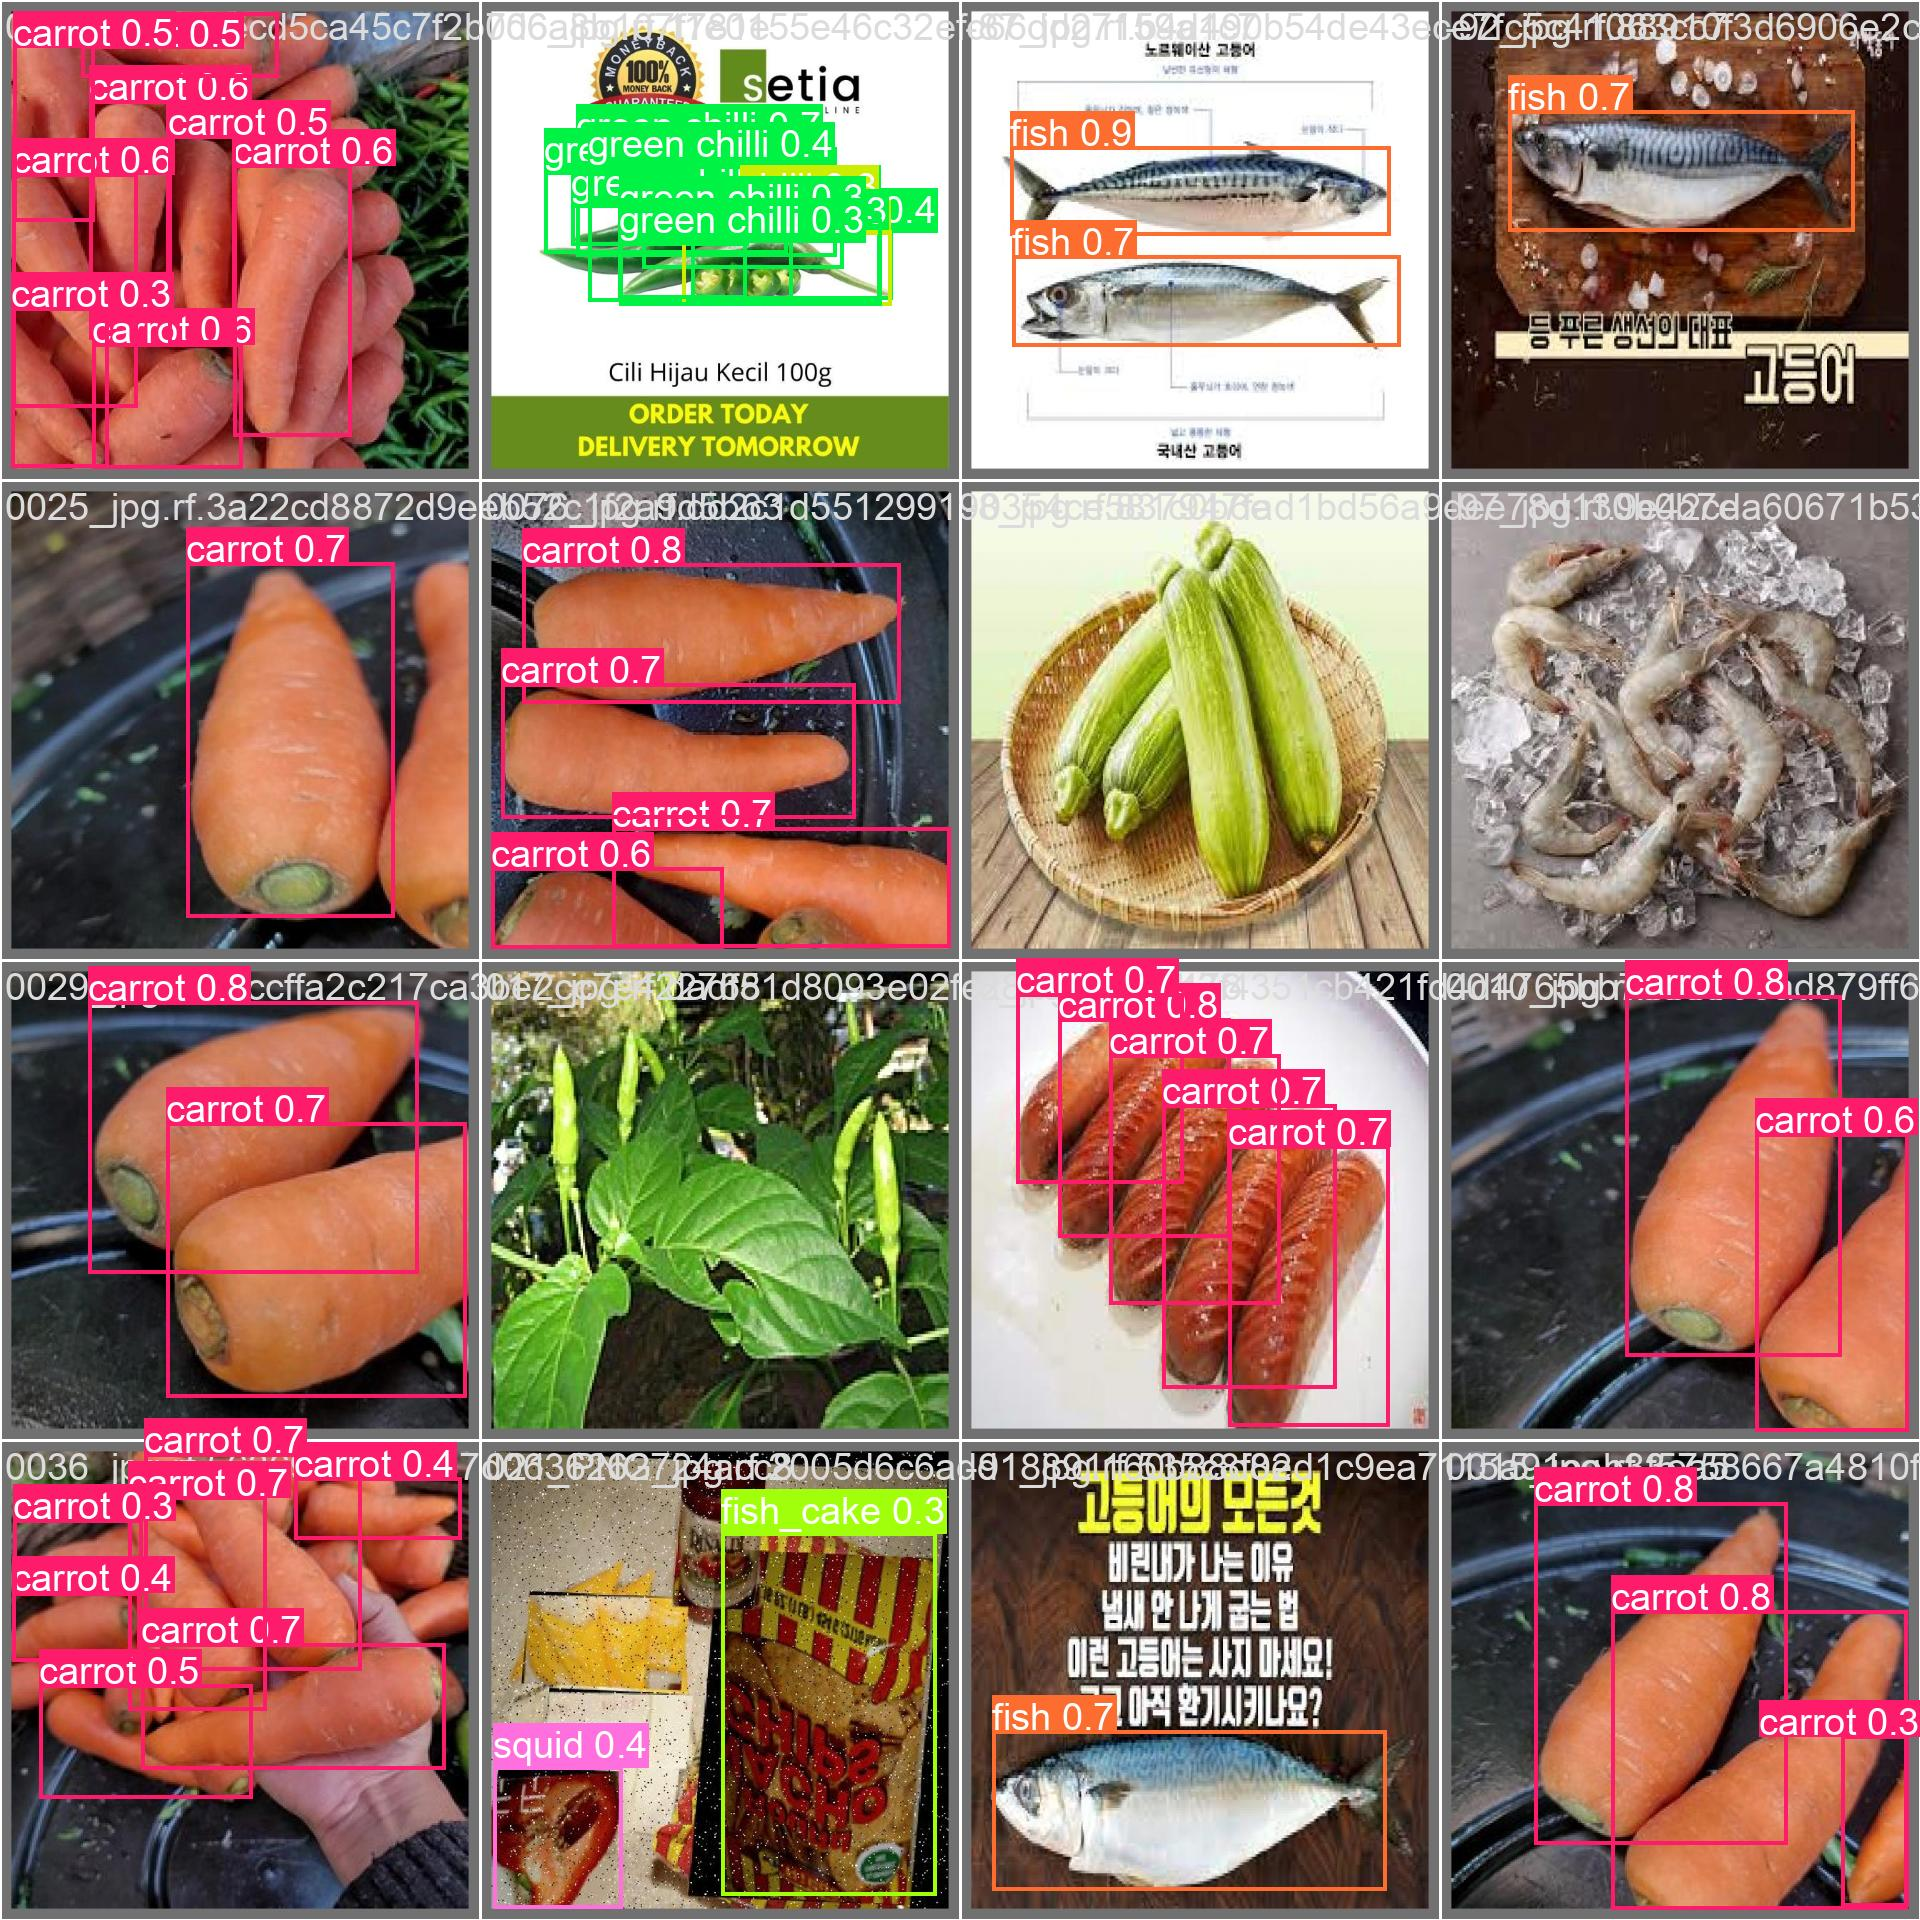

In [ ]:
# 추론 이미지 시각화
from IPython.display import Image, display
image_path = '/content/ultralytics/runs/detect/train5/val_batch2_pred.jpg'
display(Image(filename=image_path))

In [ ]:
# 7월 4일자 최선의 성능을 지닌 모델로 추가학습 및 추론해보기 (정확도 약 70%)
checkpoint_dir = '/content/drive/MyDrive/DAB/checkpoints/0704'
model = YOLO(os.path.join(checkpoint_dir, 'best.pt'))
model.train(data=data_yaml, epochs=50, imgsz=640, batch=32, cache=True)

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/니꺼내꺼/checkpoints/0704/best.pt, data=/content/drive/MyDrive/니꺼내꺼/Data_Food_Ingredients_0703/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

train: Scanning /content/drive/MyDrive/니꺼내꺼/Data_Food_Ingredients_0703/train/labels.cache... 16884 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16884/16884 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/니꺼내꺼/Data_Food_Ingredients_0703/train/images/photo-1590848791238-fb3596a2ba56_jpg.rf.0f389fd81faa7300281bc607100b096e.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2099, len(boxes) = 58138. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


train: 29.0GB RAM required to cache images with 50% safety margin but only 25.2/83.5GB available, not caching images ⚠️
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/니꺼내꺼/Data_Food_Ingredients_0703/valid/labels.cache... 1660 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1660/1660 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 491, len(boxes) = 8768. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Caching images (1.9GB RAM): 100%|██████████| 1660/1660 [00:06<00:00, 266.42it/s]


Plotting labels to /content/ultralytics/runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/ultralytics/runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       6.5G      1.104      1.195      1.359        121        640: 100%|██████████| 528/528 [01:32<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.63it/s]


                   all       1660       8768       0.61      0.521      0.584      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.93G      1.096       1.17      1.349        123        640: 100%|██████████| 528/528 [01:29<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all       1660       8768      0.658      0.495      0.571      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.95G      1.132      1.251      1.365        150        640: 100%|██████████| 528/528 [01:28<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.76it/s]


                   all       1660       8768      0.609      0.435      0.477      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.94G      1.171      1.345      1.397        103        640: 100%|██████████| 528/528 [01:28<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.49it/s]


                   all       1660       8768      0.552      0.422      0.472      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.47G      1.175      1.358        1.4        115        640: 100%|██████████| 528/528 [01:29<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.54it/s]


                   all       1660       8768      0.636      0.413      0.513      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       5.7G      1.163      1.324      1.391        107        640: 100%|██████████| 528/528 [01:27<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.06it/s]


                   all       1660       8768      0.617      0.411      0.502      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.92G      1.146      1.294      1.378        143        640: 100%|██████████| 528/528 [01:28<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


                   all       1660       8768      0.583      0.475      0.523      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         6G      1.145      1.277      1.376         91        640: 100%|██████████| 528/528 [01:28<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.46it/s]


                   all       1660       8768      0.607       0.46      0.514      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.47G      1.137      1.264      1.371        184        640: 100%|██████████| 528/528 [01:28<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.57it/s]


                   all       1660       8768      0.602      0.501      0.537      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.62G      1.136      1.252      1.372        133        640: 100%|██████████| 528/528 [01:28<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.54it/s]


                   all       1660       8768        0.6      0.507      0.566      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.38G      1.127      1.229      1.364        161        640: 100%|██████████| 528/528 [01:28<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.49it/s]


                   all       1660       8768      0.632      0.483       0.54       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.59G      1.116      1.207      1.357        136        640: 100%|██████████| 528/528 [01:27<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.48it/s]


                   all       1660       8768      0.621       0.48      0.559      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.45G      1.117      1.198      1.354        101        640: 100%|██████████| 528/528 [01:28<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.59it/s]


                   all       1660       8768       0.63      0.509      0.564       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.94G      1.111      1.191      1.355        129        640: 100%|██████████| 528/528 [01:28<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.19it/s]


                   all       1660       8768      0.623      0.538      0.591      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.38G      1.104      1.178       1.35        137        640: 100%|██████████| 528/528 [01:28<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.23it/s]


                   all       1660       8768      0.657      0.522      0.588      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.48G      1.091       1.16      1.342        122        640: 100%|██████████| 528/528 [01:28<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.60it/s]


                   all       1660       8768      0.616      0.526      0.589      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.08G      1.095      1.156       1.34        126        640: 100%|██████████| 528/528 [01:27<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.59it/s]


                   all       1660       8768      0.601      0.563      0.594      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       5.9G      1.089      1.144      1.339         92        640: 100%|██████████| 528/528 [01:28<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.64it/s]


                   all       1660       8768      0.685      0.533      0.629      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.93G       1.08      1.132      1.332        112        640: 100%|██████████| 528/528 [01:28<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.60it/s]


                   all       1660       8768      0.584      0.572      0.614      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.51G      1.081      1.108       1.33        157        640: 100%|██████████| 528/528 [01:28<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.19it/s]


                   all       1660       8768      0.629      0.554      0.611      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.95G      1.078      1.104      1.328        139        640: 100%|██████████| 528/528 [01:28<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.13it/s]


                   all       1660       8768      0.632      0.554      0.622      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.46G      1.069      1.097      1.325        160        640: 100%|██████████| 528/528 [01:28<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all       1660       8768       0.64      0.564       0.63      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.34G      1.063      1.079      1.323        103        640: 100%|██████████| 528/528 [01:28<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.56it/s]


                   all       1660       8768        0.7       0.55      0.646      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.95G      1.052      1.067      1.313        131        640: 100%|██████████| 528/528 [01:29<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.51it/s]


                   all       1660       8768      0.672      0.574      0.655      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.96G       1.05      1.055      1.309        143        640: 100%|██████████| 528/528 [01:28<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.61it/s]


                   all       1660       8768      0.698      0.558      0.666      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.68G       1.05       1.04      1.308        113        640: 100%|██████████| 528/528 [01:28<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.57it/s]


                   all       1660       8768      0.659       0.57      0.658      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.93G      1.044      1.051      1.309        163        640: 100%|██████████| 528/528 [01:28<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.62it/s]


                   all       1660       8768      0.619      0.628      0.671      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.75G      1.041      1.033      1.306         93        640: 100%|██████████| 528/528 [01:28<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.74it/s]


                   all       1660       8768      0.683      0.587      0.673      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.98G      1.031      1.023      1.297        111        640: 100%|██████████| 528/528 [01:27<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all       1660       8768      0.677      0.607      0.684      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.68G      1.027      1.004       1.29        186        640: 100%|██████████| 528/528 [01:28<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.60it/s]


                   all       1660       8768      0.672      0.606      0.692      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.17G      1.023          1      1.292         87        640: 100%|██████████| 528/528 [01:28<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.57it/s]


                   all       1660       8768      0.655      0.622      0.689      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         6G      1.013     0.9911       1.29        120        640: 100%|██████████| 528/528 [01:28<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.61it/s]


                   all       1660       8768      0.674      0.624      0.696      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.12G      1.014     0.9776      1.283        133        640: 100%|██████████| 528/528 [01:28<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.71it/s]


                   all       1660       8768      0.658       0.63       0.69      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.51G      1.003     0.9651      1.282        104        640: 100%|██████████| 528/528 [01:28<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.63it/s]


                   all       1660       8768      0.694      0.626      0.697      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.06G      1.007     0.9696      1.283        135        640: 100%|██████████| 528/528 [01:29<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.79it/s]


                   all       1660       8768      0.683       0.63      0.708      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.96G          1     0.9585      1.276        147        640: 100%|██████████| 528/528 [01:28<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.88it/s]


                   all       1660       8768      0.699      0.606      0.704      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.04G      0.995     0.9414      1.274        101        640: 100%|██████████| 528/528 [01:28<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.87it/s]


                   all       1660       8768      0.718      0.604      0.701      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.91G     0.9899     0.9352      1.266        133        640: 100%|██████████| 528/528 [01:30<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.68it/s]


                   all       1660       8768      0.725      0.603      0.712      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.93G     0.9875     0.9309      1.268        117        640: 100%|██████████| 528/528 [01:29<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.65it/s]


                   all       1660       8768      0.703      0.623      0.715      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.69G     0.9772     0.9133      1.259        144        640: 100%|██████████| 528/528 [01:30<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.72it/s]


                   all       1660       8768      0.676      0.633      0.722       0.49
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.41G     0.9506      0.794      1.286         70        640: 100%|██████████| 528/528 [01:26<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.61it/s]


                   all       1660       8768      0.675      0.634       0.71      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.31G     0.9374     0.7656      1.278         74        640: 100%|██████████| 528/528 [01:23<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.74it/s]


                   all       1660       8768      0.716      0.627      0.719      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.36G     0.9264     0.7515      1.272         68        640: 100%|██████████| 528/528 [01:24<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.68it/s]


                   all       1660       8768      0.723      0.631      0.718      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.92G     0.9214     0.7414      1.266         67        640: 100%|██████████| 528/528 [01:24<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.69it/s]


                   all       1660       8768      0.718      0.633      0.724      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.94G     0.9121     0.7275      1.261         68        640: 100%|██████████| 528/528 [01:23<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.61it/s]


                   all       1660       8768      0.736       0.63      0.723      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.81G     0.9032     0.7107      1.252         60        640: 100%|██████████| 528/528 [01:23<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.70it/s]


                   all       1660       8768      0.737      0.619      0.722      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.36G     0.8944     0.7025      1.246         62        640: 100%|██████████| 528/528 [01:24<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.76it/s]


                   all       1660       8768      0.743      0.619      0.725      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.06G     0.8889     0.6905      1.241         48        640: 100%|██████████| 528/528 [01:23<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.64it/s]


                   all       1660       8768       0.74      0.622      0.729        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.36G     0.8795     0.6815      1.236         55        640: 100%|██████████| 528/528 [01:23<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.61it/s]


                   all       1660       8768       0.73      0.631      0.724        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.87G     0.8722     0.6768      1.233         52        640: 100%|██████████| 528/528 [01:23<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.69it/s]


                   all       1660       8768      0.721      0.634      0.724        0.5

50 epochs completed in 1.351 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train4/weights/last.pt, 7.0MB
Optimizer stripped from /content/ultralytics/runs/detect/train4/weights/best.pt, 7.0MB

Validating /content/ultralytics/runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3360722 parameters, 0 gradients, 9.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.71it/s]


                   all       1660       8768       0.74      0.621      0.728        0.5
          10_tangerine         28        145      0.692      0.667      0.729      0.569
                 Apple         40        151       0.94       0.83       0.93      0.535
                Banana         31        100      0.848       0.78      0.859      0.413
              Cucumber         40        105       0.84      0.701      0.829      0.398
              Mushroom        100        292      0.626      0.258      0.338      0.171
                Orange         40        152      0.926      0.901      0.964      0.577
                Tomato         40        127      0.967      0.803        0.9      0.469
              ampalaya          3          4      0.832       0.75      0.749      0.674
                 apple         71         80      0.863      0.838      0.908       0.65
             asparagus         41         76      0.681      0.263      0.352      0.179
               avocad

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  2,   3,   5,   7,  11,  13,  16,  17,  18,  19,  20,  22,  23,  24,  25,  27,  28,  29,  31,  32,  33,  34,  36,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  48,  49,  50,  52,  54,  55,  57,  58,  59,  60,  61,  62,  63,  64,  66,  67,  68,  70,  71,  72,  73,  74,  75,  76,  77,  79,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  93,  94,  95,  96,  99, 100, 101, 102, 103, 105, 106, 111, 113, 114, 115, 118, 119, 121, 124, 126, 130, 133, 135, 137, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 153, 154, 155, 157, 159, 160, 161, 162])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78d20c4c8af0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.0060

In [ ]:
# Checkpoint 생성
best_model_path = '/content/ultralytics/runs/detect/train5/weights/best.pt'
last_model_path = '/content/ultralytics/runs/detect/train5/weights/last.pt'

drive_best_model_path = '/content/drive/MyDrive/DAB/checkpoints/0718/best.pt'
drive_last_model_path = '/content/drive/MyDrive/DAB/checkpoints/0718/last.pt'

os.makedirs(os.path.dirname(drive_best_model_path), exist_ok=True)
os.makedirs(os.path.dirname(drive_last_model_path), exist_ok=True)

shutil.copyfile(best_model_path, drive_best_model_path)
shutil.copyfile(last_model_path, drive_last_model_path)

print(f"Best model saved to {drive_best_model_path}")
print(f"Last model saved to {drive_last_model_path}")

Best model saved to /content/drive/MyDrive/니꺼내꺼/checkpoints/0704/best.pt
Last model saved to /content/drive/MyDrive/니꺼내꺼/checkpoints/0704/last.pt


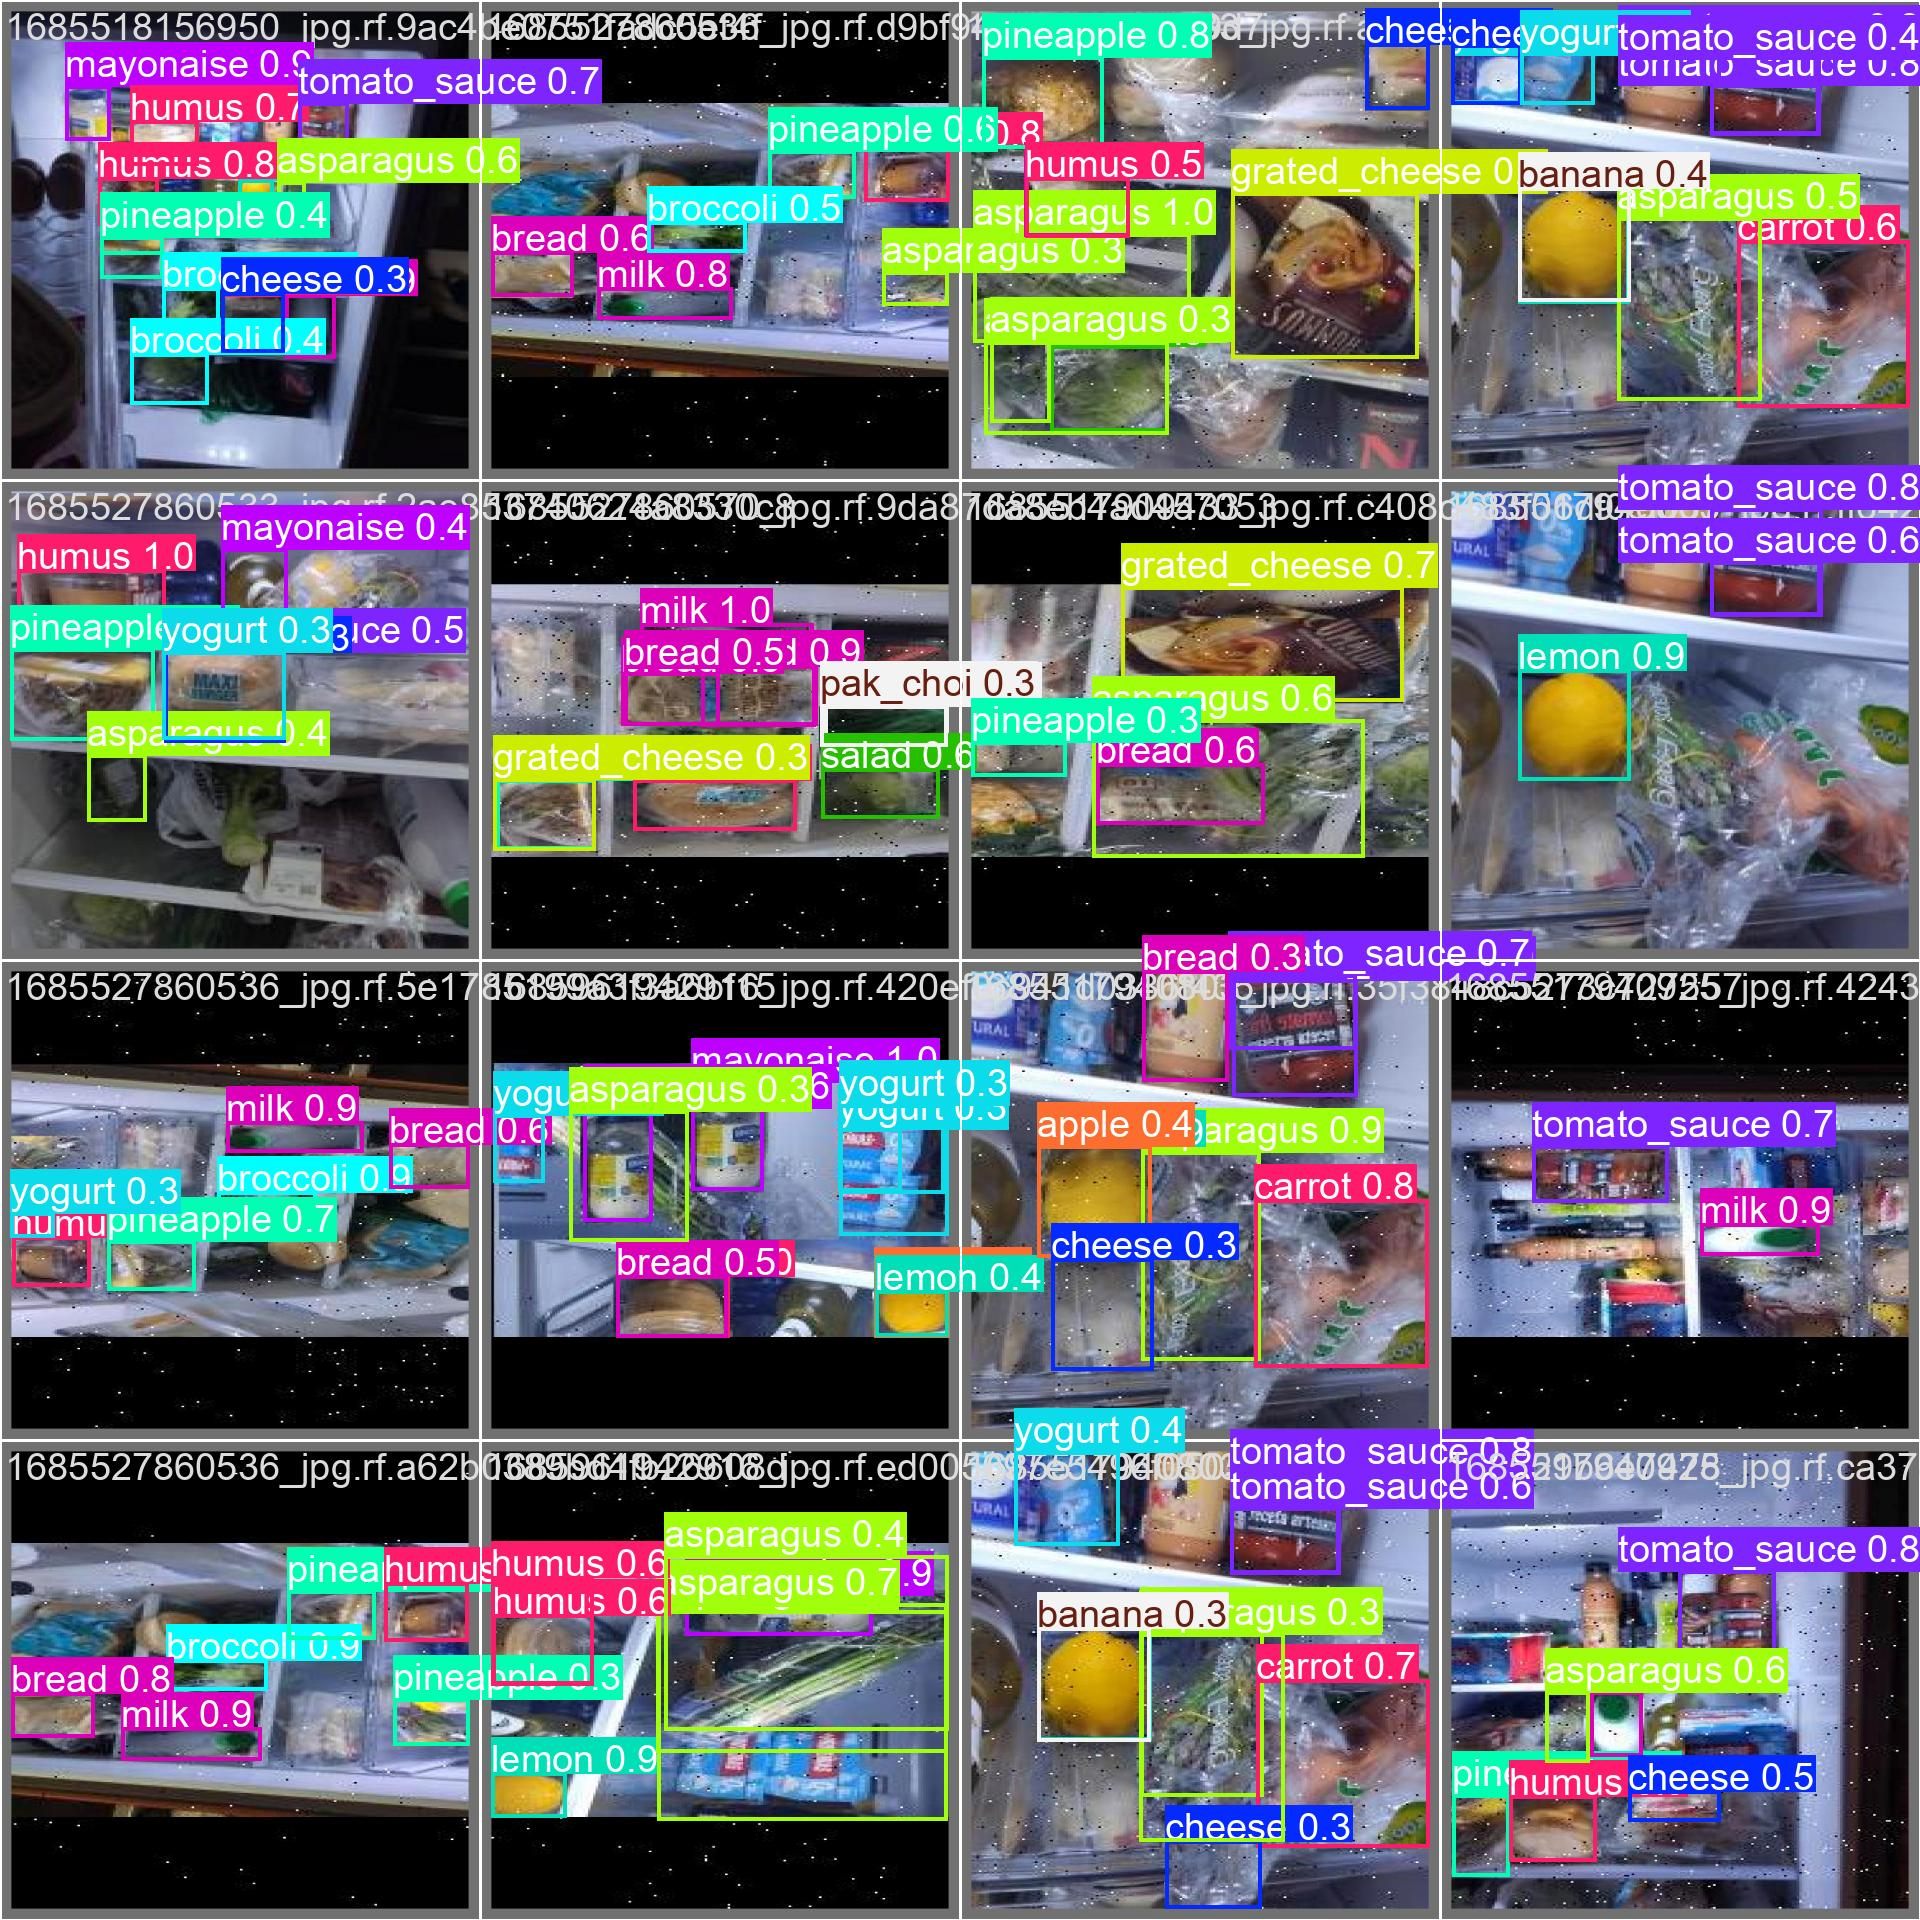

In [ ]:
# Validation image set에 대한 추론 결과 시각화
from IPython.display import Image, display
image_path = '/content/ultralytics/runs/detect/train5/val_batch1_pred.jpg'
display(Image(filename=image_path, width=1500, height=1000))


image 1/1 /content/drive/MyDrive/니꺼내꺼/tmp4.jpg: 640x640 6 10_tangerines, 1 chilli, 2 mangos, 2 tomatos, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


array([[[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [199, 199, 199],
        [198, 198, 198],
        [198, 198, 198]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [200, 200, 200],
        [200, 200, 200],
        [200, 200, 200]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [203, 203, 203],
        [203, 203, 203],
        [203, 203, 203]],

       ...,

       [[195, 197, 198],
        [195, 197, 198],
        [195, 197, 198],
        ...,
        [153, 157, 162],
        [153, 157, 162],
        [153, 157, 162]],

       [[195, 197, 198],
        [195, 197, 198],
        [195, 197, 198],
        ...,
        [153, 157, 162],
        [153, 157, 162],
        [153, 157, 162]],

       [[195, 197, 198],
        [195, 197, 198],
        [195, 197, 198],
        ...,
        [153, 157, 162],
        [153, 157, 162],
        [153, 157, 162]]], dtype=uint8)
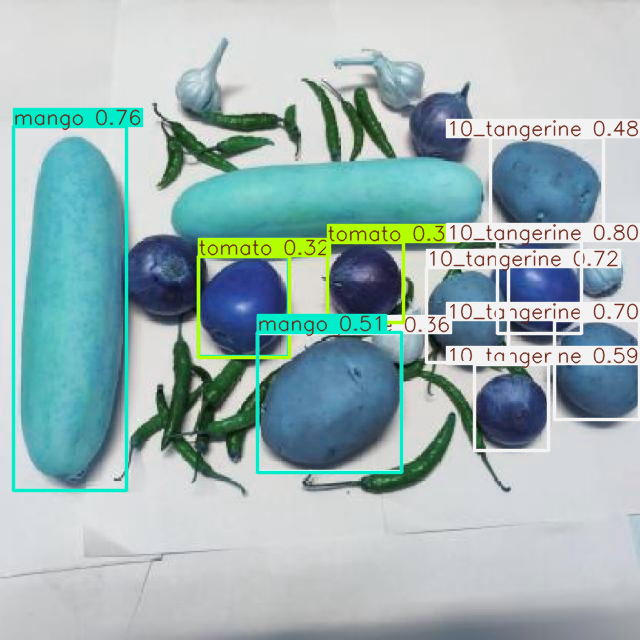

In [ ]:
# 처음 마주하는 이미지에 대한 추론 시각화
results = model('/content/drive/MyDrive/DAB/tmp4.jpg')
results[0].plot()  # 첫 번째 이미지의 결과 시각화